<h1>Data Analysis Project: Air Quality Dataset Aotizhongxin </h1>

<ul>
  <li>Name: Ronald Silvester Sanger </li>
  <li>E-mail: m180b4ky3964@bangkit.academy</li>
  <li>ID Dicoding: ronald_silvester </li>
</ul>

<h1>Questions:</h1>

<ul>
  <li>Question 1: What is the correlation between wind speed (WSPM) and PM2.5 concentration levels?</li>
  <li>Question 2: Are there identifiable seasonal patterns in PM10 concentration levels across different months or seasons?</li>
</ul>

<h1>Libraries Used</h1>

In [58]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Data Wrangling</h1>

<h2>Cleaning</h2>

In [64]:
file_path = r'D:\Kuliah\Bangkit\PRSA_Data_20130301-20170228\PRSA_Data_Aotizhongxin_20130301-20170228.csv'
data = pd.read_csv(file_path)


data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data_cleaned = data.drop(columns=['No', 'station', 'wd'])
data_cleaned = data_cleaned.dropna(subset=['PM2.5', 'PM10', 'WSPM'])

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data_cleaned['season'] = data_cleaned['month'].apply(get_season)

cleaned_file_path = r'D:\Kuliah\Bangkit\Cleaned_PRSA_Data_20130301-20170228(2).csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Data cleaned and saved to {cleaned_file_path}")


Data cleaned and saved to D:\Kuliah\Bangkit\Cleaned_PRSA_Data_20130301-20170228(2).csv


<h2>Clustering</h2>

In [10]:
file_path = r'D:\Kuliah\Bangkit\PRSA_Data_20130301-20170228\PRSA_Data_Aotizhongxin_20130301-20170228.csv'
data = pd.read_csv(file_path)

data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

data_cleaned = data.drop(columns=['No', 'station', 'wd'])
data_cleaned = data_cleaned.dropna(subset=['PM2.5', 'PM10', 'WSPM'])

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data_cleaned['season'] = data_cleaned['month'].apply(get_season)

seasonal_clusters = data_cleaned.groupby('season').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean'
}).reset_index()

print(seasonal_clusters)


   season      PM2.5        PM10        SO2        NO2           CO         O3
0    Fall  86.569860  110.090641  11.232886  69.088737  1314.525592  32.554219
1  Spring  81.207580  132.035218  21.573476  55.294110  1009.564870  67.362031
2  Summer  67.551605   81.507977   6.176350  48.685590   843.698203  92.618771
3  Winter  96.346166  116.981086  31.434068  64.959324  1920.473432  30.104608


<h3>Winter:</h3>
<ul>
  <li><strong>High pollutant levels:</strong> This season has the highest levels of fine particulate matter (PM2.5) and carbon monoxide (CO), which could be due to increased heating, reduced dispersion in cold air, or more industrial activities.</li>
  <li><strong>Ozone (O3) is low:</strong> Ozone levels are relatively low, which is common in colder temperatures as there is less sunlight to cause photochemical reactions that produce ozone.</li>
</ul>

<h3>Spring:</h3>
<ul>
  <li><strong>Moderate pollution:</strong> PM2.5 and CO levels are lower than in Winter, but still significant.</li>
  <li><strong>High O3 levels:</strong> Ozone levels increase compared to Winter, likely due to increased sunlight and photochemical reactions.</li>
  <li><strong>PM10 is higher than in Winter:</strong> This could be due to more dust or pollen in the air during the spring season.</li>
</ul>

<h3>Summer:</h3>
<ul>
  <li><strong>Lowest particulate matter (PM2.5 and PM10):</strong> Air quality in terms of particulate matter improves during Summer, possibly due to more wind or rain dispersing pollutants.</li>
  <li><strong>High Ozone levels (O3):</strong> Ozone levels are highest in Summer, likely due to sunlight driving photochemical reactions that produce ozone.</li>
</ul>

<h3>Fall:</h3>
<ul>
  <li><strong>Moderate pollution levels:</strong> Pollution levels start to increase again as temperatures cool. PM2.5, PM10, and CO are higher than in Summer but lower than in Winter.</li>
  <li><strong>NO2 and CO levels remain high:</strong> Fall seems to have relatively high nitrogen dioxide and carbon monoxide levels, perhaps due to increased vehicle emissions or industrial activities.</li>
</ul>


<h1>Exploratory Data Analysis</h1>

<h2>PLOT: Scatter Plot & Bar Plot</h2>

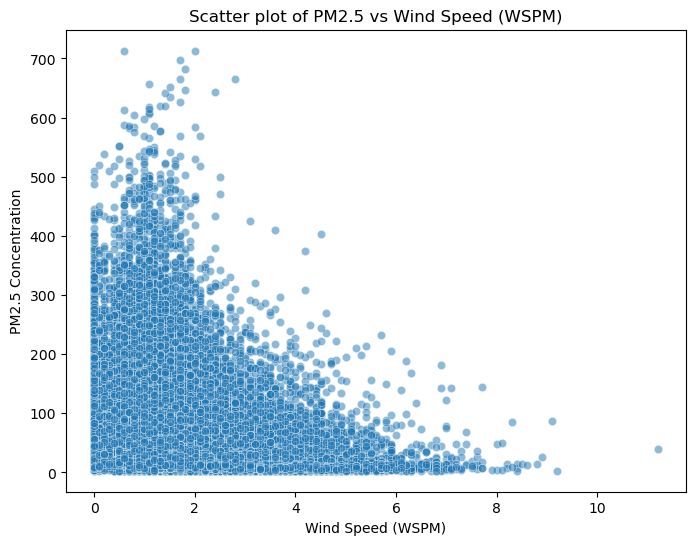

Correlation between PM2.5 and WSPM:
          PM2.5      WSPM
PM2.5  1.000000 -0.279599
WSPM  -0.279599  1.000000


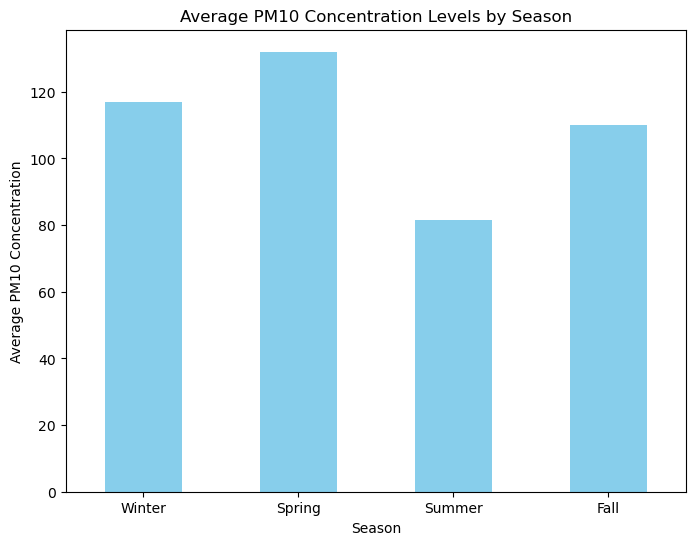

Seasonal PM10 averages:
season
Winter    116.981086
Spring    132.035218
Summer     81.507977
Fall      110.090641
Name: PM10, dtype: float64


In [66]:
file_path = r'D:\Kuliah\Bangkit\Cleaned_PRSA_Data_20130301-20170228.csv'

cleaned_data = pd.read_csv(file_path)
correlation = cleaned_data[['PM2.5', 'WSPM']].corr()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='WSPM', y='PM2.5', data=cleaned_data, alpha=0.5)
plt.title('Scatter plot of PM2.5 vs Wind Speed (WSPM)')
plt.xlabel('Wind Speed (WSPM)')
plt.ylabel('PM2.5 Concentration')
plt.show()

print("Correlation between PM2.5 and WSPM:")
print(correlation)

seasonal_pm10 = cleaned_data.groupby('season')['PM10'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

plt.figure(figsize=(8, 6))
seasonal_pm10.plot(kind='bar', color='skyblue')
plt.title('Average PM10 Concentration Levels by Season')
plt.xlabel('Season')
plt.ylabel('Average PM10 Concentration')
plt.xticks(rotation=0)
plt.show()

print("Seasonal PM10 averages:")
print(seasonal_pm10)


<h1>Explanatory Analysis</h1>

<h2>For Question 1</h2>

<ul>
  <li>The correlation coefficient between wind speed (WSPM) and PM2.5 concentration is approximately -0.28, indicating a weak negative correlation. This means that, as wind speed increases, PM2.5 concentration tends to slightly decrease.</li>
  <li>The scatter plot visualizes this relationship, showing that there is some tendency for higher wind speeds to be associated with lower PM2.5 levels, though the trend is not very strong.</li>
</ul>

<h2>For Question 2</h2>

<ul>
    <li>The average PM10 concentration levels by season are:
        <ul>
            <li><strong>Winter:</strong> 116.98</li>
            <li><strong>Spring:</strong> 132.04</li>
            <li><strong>Summer:</strong> 81.51</li>
            <li><strong>Fall:</strong> 110.09</li>
        </ul>
    </li>
    <li>The bar plot sh <stro</strong> has the highest average PM10 concentratio <stro</strong> has the lowest. This indicates a potential seasonal pattern where air quality improves during the summer and worsens in the spring.</li>
</ul>


<h1>Conclusion</h1>

<ul>
        <li>Correlation between Wind Speed (WSPM) and PM2.5 Levels:
            <ul>
                <li>The correlation coefficient between WSPM and PM2.5 is approximately -0.28, indicating a weak negative correlation. This suggests that higher wind speeds tend to slightly reduce the concentration of PM2.5 particles in the air. Although the correlation is not very strong, it implies that wind can help disperse particulate matter, contributing to better air quality.</li>
            </ul>
        </li>
        <li>Seasonal Patterns in PM10 Concentration Levels:
             <ul>
                <li>The seasonal analysis reveals distinct patterns in PM10 levels. Spring has the highest average concentration of PM10 (132.04), while Summer has the lowest (81.51). This pattern suggests that air quality tends to worsen in spring and improve in summer, likely due to a combination of seasonal factors such as increased industrial activity, weather patterns, and natural events like dust storms.</li>
            </ul>
    </ul>